In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF

In [2]:
spy = yf.Ticker("SPY")

In [3]:
stock = spy.history(period = "max")
stock.reset_index(inplace = True)
stock

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1993-01-29,26.20,26.20,26.07,26.18,1003200,0.0,0
1,1993-02-01,26.20,26.37,26.20,26.37,480500,0.0,0
2,1993-02-02,26.35,26.44,26.30,26.43,201300,0.0,0
3,1993-02-03,26.46,26.72,26.44,26.71,529400,0.0,0
4,1993-02-04,26.80,26.87,26.50,26.82,531500,0.0,0
...,...,...,...,...,...,...,...,...
6907,2020-07-06,316.37,317.68,315.56,317.05,61713800,0.0,0
6908,2020-07-07,315.38,317.52,313.37,313.78,82910000,0.0,0
6909,2020-07-08,314.61,316.30,312.70,316.18,54638600,0.0,0
6910,2020-07-09,316.84,317.10,310.68,314.38,83354200,0.0,0


In [4]:
type(stock)

pandas.core.frame.DataFrame

In [5]:
stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

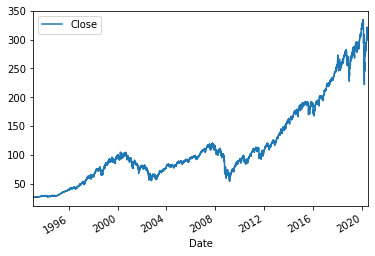

In [6]:
stock.plot(x = "Date", y = "Close")

In [7]:
test = stock[(stock.Date >= "2019-11-01") & (stock.Date <= "2019-12-01")]
stock = stock[(stock.Date >= "2019-08-01") & (stock.Date <= "2019-11-01")]

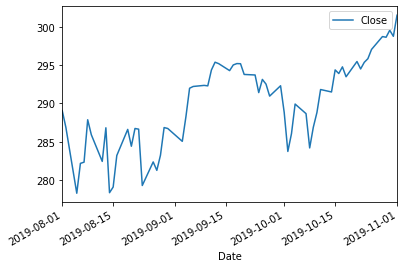

In [8]:
stock.plot(x = "Date", y = "Close")

In [9]:
stock["diff_1"] = (stock.Close - stock.Close.shift(-1))

/home/chen/work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


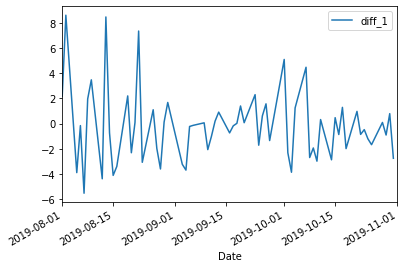

In [10]:
stock.plot(x = "Date", y = "diff_1")

In [11]:
stock["diff_2"] = (stock.diff_1 - stock.diff_1.shift(-1))

/home/chen/work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


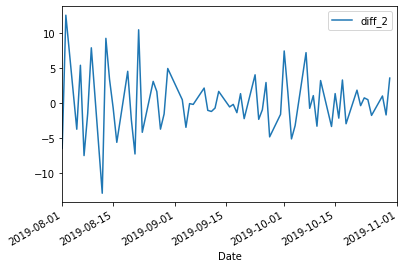

In [12]:
stock.plot(x = "Date", y = "diff_2")

In [13]:
stock_adf = ADF(stock.Close)
stock_adf

(-1.5584855524669037,
 0.504406870455912,
 0,
 65,
 {'1%': -3.5352168748293127,
  '5%': -2.9071540828402367,
  '10%': -2.5911025443786984},
 243.40673299998605)

- p-value of the stock price, -1.5584855524669037, is greater than -2.8853397507076006, the 5% alpha.
- We cannot reject the null hypothesis, which states that the data is not stationary.

Interpreting ADF https://stackoverflow.com/questions/47349422/how-to-interpret-adfuller-test-results

In [14]:
stock.diff_1.fillna(0,inplace = True)
stock_adf = ADF(stock.diff_1)
stock_adf

/home/chen/work/venv/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


(-8.17674265403581,
 8.337730953954284e-13,
 1,
 64,
 {'1%': -3.53692771987915,
  '5%': -2.907887369384766,
  '10%': -2.591493291015625},
 241.83298344997314)

- p-value of the first differentiation, -8.17674265403581, is less than -2.8853397507076006, the 5% alpha value, and even less than the 1% alpha value.
- We can reject the null hypothesis, which states that the data is  stationary.

In [15]:
stock.diff_2.fillna(0,inplace = True)
stock_adf = ADF(stock.diff_2)
stock_adf

(-5.668742533847874,
 9.024238041999656e-07,
 7,
 58,
 {'1%': -3.548493559596539,
  '5%': -2.912836594776334,
  '10%': -2.594129155766944},
 251.5027367456583)

- p-value of the second differentiation is less than -2.8853397507076006, the 5% alpha value, but since the first differentiation is enough for us to reject the null hypothesis, we'll stick with that.

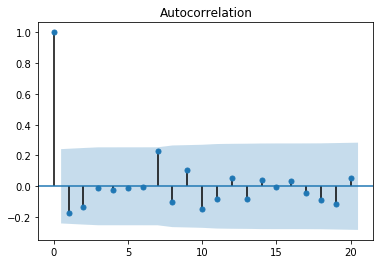

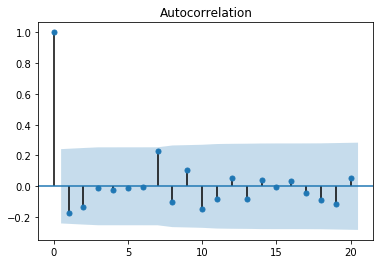

In [16]:
sm.graphics.tsa.plot_acf(stock.diff_1, lags=20, alpha = 0.05)

- p is 2

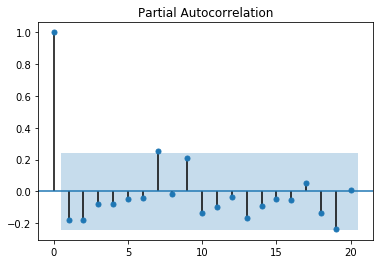

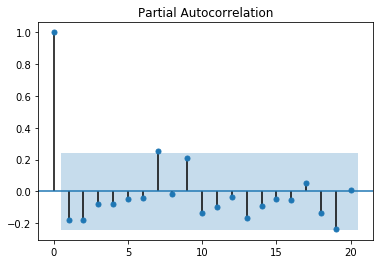

In [17]:
sm.graphics.tsa.plot_pacf(stock.diff_1, lags=20, alpha = 0.05)

- q is 4

In [18]:
model = ARIMA(stock.Close, order=(1,1,1))

/home/chen/work/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/chen/work/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [19]:
model_fit = model.fit()

In [20]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                   65
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -158.084
Method:                       css-mle   S.D. of innovations              2.751
Date:                Mon, 13 Jul 2020   AIC                            324.168
Time:                        01:22:08   BIC                            332.866
Sample:                             1   HQIC                           327.600
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2153      0.202      1.067      0.286      -0.180       0.610
ar.L1.D.Close     0.3687      0.279      1.323      0.186      -0.178       0.915
ma.L1.D.Close    -0.6342      0.227     -2.797      0.005      -1.079      -0.190
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.7121           +0.0000j            2.7121            0.0000
MA.1            1.5769           +0.0000j            1.5769            0.0000
-----------------------------------------------------------------------------
"""

In [21]:
forecast = pd.DataFrame({"forecast" : model_fit.forecast(steps=30)[0]})

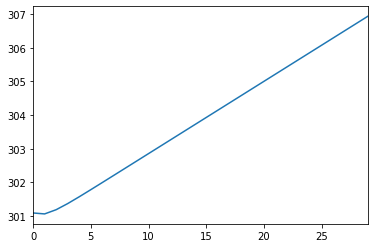

In [22]:
forecast.forecast.plot()

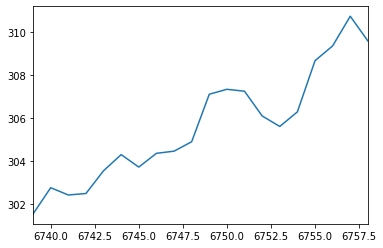

In [23]:
test.Close.plot()